In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
DATA_DIR = '../../../data/LinkedIn'
JOB_DIR = f'{DATA_DIR}/raw/job_details'
COMPANY_DIR = f'{DATA_DIR}/raw/company_details'

## Data description

```
job_postings.csv
job_id: The job ID as defined by LinkedIn (https://www.linkedin.com/jobs/view/ job_id )
company_id: Identifier for the company associated with the job posting (maps to companies.csv)
title: Job title.
description: Job description.
max_salary: Maximum salary
med_salary: Median salary
min_salary: Minimum salary
pay_period: Pay period for salary (Hourly, Monthly, Yearly)
formatted_work_type: Type of work (Fulltime, Parttime, Contract)
location: Job location
applies: Number of applications that have been submitted
original_listed_time: Original time the job was listed
remote_allowed: Whether job permits remote work
views: Number of times the job posting has been viewed
job_posting_url: URL to the job posting on a platform
application_url: URL where applications can be submitted
application_type: Type of application process (offsite, complex/simple onsite)
expiry: Expiration date or time for the job listing
closed_time: Time to close job listing
formatted_experience_level: Job experience level (entry, associate, executive, etc)
skills_desc: Description detailing required skills for job
listed_time: Time when the job was listed
posting_domain: Domain of the website with application
sponsored: Whether the job listing is sponsored or promoted.
work_type: Type of work associated with the job
currency: Currency in which the salary is provided.
compensation_type: Type of compensation for the job.
```

In [7]:
df_jobs = pd.read_csv(f'{DATA_DIR}/raw/job_postings.csv')
df_jobs.head()

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,expiry,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,USD,BASE_SALARY
1,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
2,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,CONTRACT,NaN,NaN
3,381055942,96654609.0,Business Manager,Business ManagerFirst Baptist Church ForneyFor...,NaN,NaN,NaN,NaN,Full-time,"Forney, TX",...,1.700000e+12,NaN,NaN,NaN,1.690000e+12,NaN,0,FULL_TIME,NaN,NaN
4,529257371,1244539.0,NY Studio Assistant,YOU COULD BE ONE OF THE MAGIC MAKERS\nKen Fulk...,NaN,NaN,NaN,NaN,Full-time,"New York, NY",...,1.710000e+12,NaN,NaN,NaN,1.690000e+12,NaN,1,FULL_TIME,NaN,NaN


In [6]:
df_jobs.columns

Index(['job_id', 'company_id', 'title', 'description', 'max_salary',
       'med_salary', 'min_salary', 'pay_period', 'formatted_work_type',
       'location', 'applies', 'original_listed_time', 'remote_allowed',
       'views', 'job_posting_url', 'application_url', 'application_type',
       'expiry', 'closed_time', 'formatted_experience_level', 'skills_desc',
       'listed_time', 'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type'],
      dtype='object')

In [7]:
df_jobs.shape

(15886, 27)

## Availability of data on skills desc

In [10]:
df_skills_desc = df_jobs.dropna(subset=['skills_desc'])
df_skills_desc.shape

(144, 27)

## Availability of data for remote

In [13]:
df_jobs_remote = df_jobs.dropna(subset=['remote_allowed'])

In [14]:
df_jobs_remote.shape

(2340, 27)

In [58]:
df_jobs_remote['remote_allowed']

6        1.0
9        1.0
13       1.0
15       1.0
16       1.0
        ... 
15858    1.0
15867    1.0
15869    1.0
15871    1.0
15872    1.0
Name: remote_allowed, Length: 2340, dtype: float64

In [21]:
set(df_jobs_remote['remote_allowed'])

{1.0}

(array([   0., 2340.]),
 array([0.5, 1. , 1.5]),
 <BarContainer object of 2 artists>)

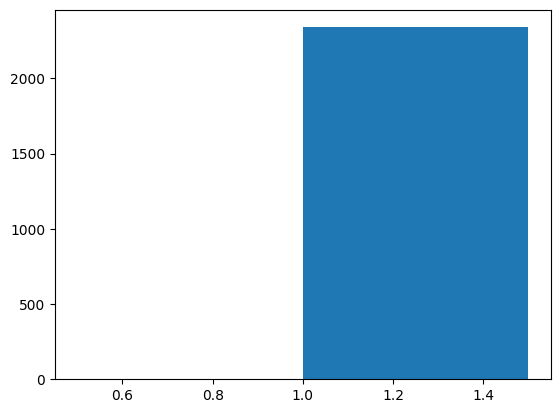

In [22]:
plt.hist(df_jobs_remote['remote_allowed'], bins=2)

## Availability of data for salary

In [38]:
df_jobs_salary = df_jobs.dropna(subset=['max_salary', 'min_salary'])
df_jobs_salary_max.shape

(5521, 27)

In [52]:
df_jobs_salary['max_salary']

0         52000.00
5         42000.00
8            50.00
12           20.00
13        12000.00
           ...    
15870     85000.00
15871     70000.00
15875        23.89
15878    105200.00
15884    135000.00
Name: max_salary, Length: 5521, dtype: float64

In [50]:
df_jobs_salary['min_salary']

0         45760.00
5         37000.00
8            50.00
12           18.00
13        12000.00
           ...    
15870     75000.00
15871     60000.00
15875        19.08
15878     91900.00
15884    110000.00
Name: min_salary, Length: 5521, dtype: float64

(array([4.003e+03, 1.351e+03, 1.310e+02, 1.800e+01, 2.000e+00, 1.100e+01,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([1.000000e+01, 1.300090e+05, 2.600080e+05, 3.900070e+05,
        5.200060e+05, 6.500050e+05, 7.800040e+05, 9.100030e+05,
        1.040002e+06, 1.170001e+06, 1.300000e+06]),
 <BarContainer object of 10 artists>)

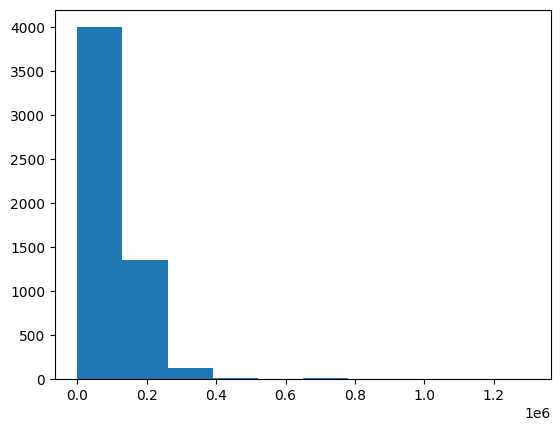

In [44]:
plt.hist(df_jobs_salary['max_salary'])

(array([3.606e+03, 1.628e+03, 2.540e+02, 2.600e+01, 2.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([1.00000e+01, 8.00090e+04, 1.60008e+05, 2.40007e+05, 3.20006e+05,
        4.00005e+05, 4.80004e+05, 5.60003e+05, 6.40002e+05, 7.20001e+05,
        8.00000e+05]),
 <BarContainer object of 10 artists>)

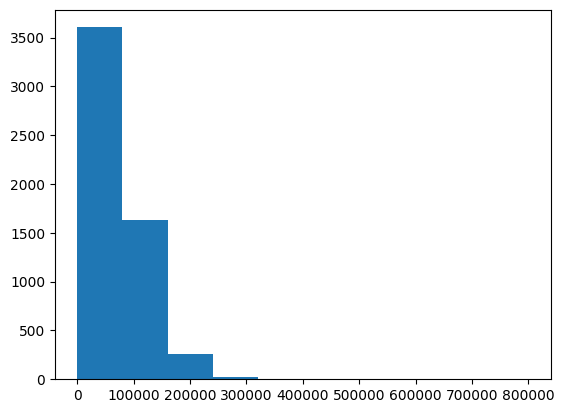

In [45]:
plt.hist(df_jobs_salary['min_salary'])

## Availability of data for experience level

In [5]:
df_jobs_exp = df_jobs.dropna(subset=['formatted_experience_level'])
df_jobs_exp.shape

(10984, 27)

In [6]:
df_jobs_exp['formatted_experience_level']

15            Entry level
16            Entry level
17            Entry level
18              Associate
19            Entry level
               ...       
15880         Entry level
15881         Entry level
15882         Entry level
15883         Entry level
15884    Mid-Senior level
Name: formatted_experience_level, Length: 10984, dtype: object

In [9]:
from collections import defaultdict

expCount = defaultdict(int)

for expLevel in df_jobs_exp['formatted_experience_level']:
    expCount[expLevel] += 1

expCount

defaultdict(int,
            {'Entry level': 3694,
             'Associate': 1220,
             'Mid-Senior level': 5083,
             'Director': 687,
             'Executive': 134,
             'Internship': 166})

In [12]:
df_entry_level = df_jobs_exp[df_jobs_exp['formatted_experience_level'] == 'Entry level']
df_entry_level.shape

(3694, 27)

In [22]:
df_entry_level['applies'].mean()

15.277256317689531

In [26]:
df_entry_level['views'].mean()

64.34079422382672

In [33]:
df_mid_senior_level = df_jobs_exp[df_jobs_exp['formatted_experience_level'] == 'Mid-Senior level']
df_mid_senior_level['applies'].mean()

26.39567387687188

26.39567387687188

In [25]:
df_mid_senior_level['views'].mean()

87.96201351666278

In [32]:
df_associate = df_jobs_exp[df_jobs_exp['formatted_experience_level'] == 'Associate']
df_associate['applies'].mean()

29.704271631982476

In [29]:
df_associate['views'].mean()

108.31842105263158

In [30]:
df_director = df_jobs_exp[df_jobs_exp['formatted_experience_level'] == 'Director']
df_director['views'].mean()

104.2377300613497

In [31]:
df_director['applies'].mean()

23.52914798206278

(array([3694.,    0., 1220.,    0., 5083.,    0.,  687.,    0.,  134.,
         166.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

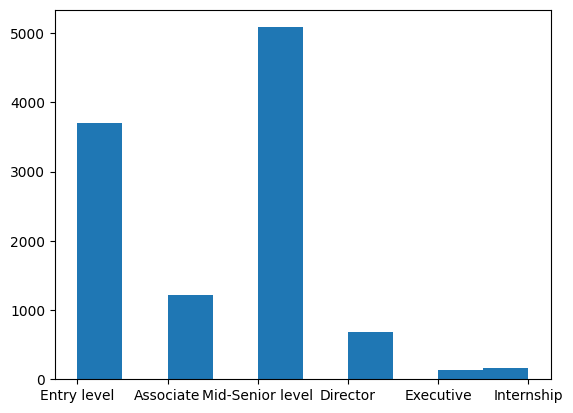

In [59]:
plt.hist(df_jobs_exp['formatted_experience_level'])

(array([859.,  29.,  13.,   5.,   2.,   2.,   1.,   1.,   0.,   1.]),
 array([  1. ,  98.9, 196.8, 294.7, 392.6, 490.5, 588.4, 686.3, 784.2,
        882.1, 980. ]),
 <BarContainer object of 10 artists>)

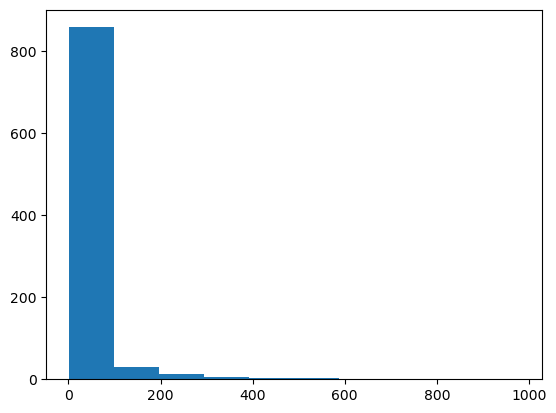

In [34]:
plt.hist(df_associate['applies'])

## Availability of data for applications submitted

In [61]:
df_jobs_apply = df_jobs.dropna(subset=['applies'])
df_jobs_apply.shape

(8700, 27)

In [62]:
df_jobs_apply['applies']

2         1.0
5         5.0
6        45.0
7        28.0
10       10.0
         ... 
15876    11.0
15877    15.0
15878     4.0
15882     2.0
15885     2.0
Name: applies, Length: 8700, dtype: float64

(array([8.518e+03, 1.410e+02, 2.400e+01, 1.000e+01, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.0000e+00, 1.6240e+02, 3.2380e+02, 4.8520e+02, 6.4660e+02,
        8.0800e+02, 9.6940e+02, 1.1308e+03, 1.2922e+03, 1.4536e+03,
        1.6150e+03]),
 <BarContainer object of 10 artists>)

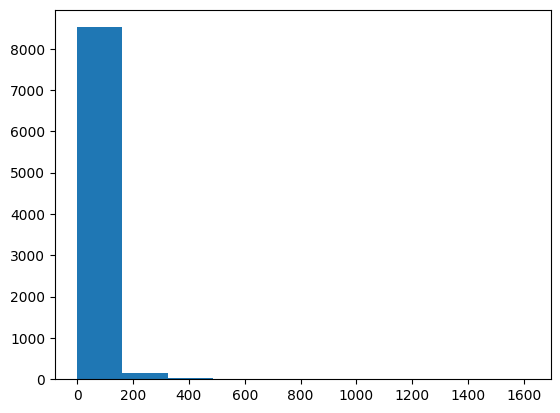

In [65]:
plt.hist(df_jobs_apply['applies'])